# 第三章　二次元のデータ

### 相関
2変数x,yの間に区別を設けずに対等に見る

=> 「相関がある」は相関係数が1, -1に近くなるときに言うイメージでこの日本語とは食い違う

### 回帰

xからyが決定される様子や程度


## 相関係数

相関の程度を示す指標<br>
複数定義があるが、よく用いられるのは**ピアソンの積率相関係数**で、通常相関係数はこれを指す

相関係数は常に絶対値１以内に収まる

$$
    r_{xy} = \sqrt({x_i - \bar{x}})
$$

corr は correlation の　corr

In [2]:
import pandas as pd
import numpy as np

# テスト用のリストを作る
l1=list(np.random.randint(0, 10, 10))
l2=list(np.random.randint(0, 10, 10))

# 作ったlist
print(l1)
[4, 6, 0, 8, 6, 2, 0, 3, 3, 5]
print(l2)
[4, 6, 3, 7, 8, 4, 6, 9, 0, 0]

# リストをps.Seriesに変換
s1=pd.Series(l1)
s2=pd.Series(l2)

# pandasを使用してPearson's rを計算
res=s1.corr(s2)   # numpy.float64 に格納される

# 結果
print(res)
0.23385611715924406

[6, 0, 2, 9, 5, 7, 8, 8, 1, 8]
[4, 6, 1, 3, 5, 0, 1, 8, 2, 2]
-0.06441566264008308


0.23385611715924406

## 共分散
covariance

偏差積の合計<br>
相関係数の式の分子

## 偏相関係数

x,y,zとあったときに<br>
z <=> x <br>
z <=> y <br>
に相関があったときに、x<=>yに強く相関が出てしまう

偏相関係数とは、zの効果を取り除いたx,yの相関係数のこと

## 順位相関係数

順位間の相関を示す


順位の順番が完全に一致しているとき +1, 完全に逆の時 -1をして、足し合わせる

In [4]:
import numpy as np

math    = [6, 4, 5, 10, 2, 8, 3, 9, 1, 7]
english = [10, 1, 4, 9, 3, 8, 6, 5, 2, 7]

def spearman(math, english):
    math = np.array(math)
    english = np.array(english)
    N = len(math)

    return 1 - (6*sum((math -english)**2) / (N*(N**2 - 1)))

spearman(math ,english)

0.6727272727272727

# 自己相関

lag1の自己相関係数が1ならば？　=> 現在のデータは一つ前のデータと比較して必ず大きくなる<br>
lag6の自己相関係数が-1ならば？ => 現在のデータは6個前のデータと比較して必ず小さくなる<br>

In [17]:
# 1から10を3回繰り返す1次元arrayを作ります。

import numpy as np
a = np.arange(1,11)
b = np.tile(a, 3)

print(b)

[ 1  2  3  4  5  6  7  8  9 10  1  2  3  4  5  6  7  8  9 10  1  2  3  4
  5  6  7  8  9 10]


In [9]:
# ラグがkのデータとの自己相関を求めるautocorrelation関数を作ります。

def autocorrelation(data, k):
    """Returns the autocorrelation of the *k*th lag in a time series data.

    Parameters
    ----------
    data : one dimentional numpy array
    k : the *k*th lag in the time series data (indexing starts at 0)
    """

    # yの平均
    y_avg = np.mean(data)

    # 分子の計算
    sum_of_covariance = 0
    for i in range(k+1, len(data)):
        covariance = ( data[i] - y_avg ) * ( data[i-(k+1)] - y_avg )
        sum_of_covariance += covariance

    # 分母の計算
    sum_of_denominator = 0
    for u in range(len(data)):
        denominator = ( data[u] - y_avg )**2
        sum_of_denominator += denominator

    return sum_of_covariance / sum_of_denominator

In [11]:
# 4番目のラグ、9番目のラグとの自己相関を求めてみます。

print(autocorrelation(b, 4))

print(autocorrelation(b, 9))


-0.4292929292929293
0.6666666666666666


In [15]:
# グラフ上ではラグのない自身との相関を1として表示させたいのでacorr_dataに「1」を最初に入れておきます。

acorr_data = [1]
for i in range(29):  # ラグをとったデータは29個あるのでrange(29)となります。
    acorr_data.append(autocorrelation(b, i))

# 後で使いやすいようにacorr_dataをnumpyのarrayに変換しておきます。
acorr_data = np.asarray(acorr_data)

<StemContainer object of 3 artists>

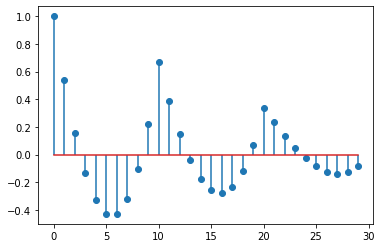

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.stem(np.arange(30), acorr_data, use_line_collection=True)

⬆︎ これをコレログラムと呼ぶ

# 最小二乗法による直線の当てはめ

2変数x,yの回帰を表現する最も当てはまりがいい直線を引くこと<br>

$$
    y = bx + a
$$

$$
    L = \sum_{i=1}^{n} (y_i - (bx_i + a))
$$

で表される二乗和を最小にするような直線

### 決定係数

回帰と相関の考えにはつながりがあり、回帰係数を変形すると

$$
    b = r\frac{S_x}{S_y}
$$

と言う関係が成立する


- 「全変動」：実際のデータとデータ全体の平均値との差を表します（上の図の緑の部分）
- 「回帰変動」：推定された回帰式から得られた予測値とデータ全体の平均値の差を表します（上の図の紫の部分）
- 「残差変動」：実際のデータと推定された回帰式から得られた予測値との差を表します（上の図の赤の部分）

「回帰変動が全変動に対してどれだけ多いか＝残差変動が全変動に対してどれだけ少ないか」を表すもの

「全変動」＝「回帰変動」＋「残差変動」の関係が成り立つ<br>
この式を展開すると
$$
    R^2 = \frac{回帰変動}{全変動}
$$

R = 相関係数, R^2 = 決定係数